In [104]:
import gzip
import re
import matplotlib.pyplot as plt
import pylab as plti
import numpy as np

In [117]:
def calc_test(data):
    count = 0
    with open(data, "r") as f:
        q_dict = {}
        for line in f:
            line = line.split()
            if len(line) > 0:
                q_word = line[0].lower()
                if q_word in ["who", "what", "when", "where", "why", "how", "is", "whom"]:
                    if q_word not in q_dict.keys():
                        q_dict[q_word] = 1
                    else:
                        q_dict[q_word] += 1
                count += 1
        print(q_dict)
        print(count / 2)
        for q_word in ["who", "what", "when", "where", "why", "how", "is", "whom"]:
            if q_word not in q_dict.keys():
                q_dict[q_word] = 0
        return(q_dict, count / 2)

In [118]:
def calc_actual():
    with gzip.open("./WikiQA/WikiQA-dev.tsv.gz", 'rb') as f:
        next(f)
        q_dict = {}
        count = 0
        for line in f:
            line = line.decode('UTF-8')
            line = line.lower()
            arr = line.split("\t")
            alpha = re.compile('[^0-9a-zA-Z]')
            q = alpha.sub(' ', str(arr[1]))
            q = q.split()
            q = q[0]
            if q in ["who", "what", "when", "where", "why", "how", "is", "whom"]:
                if q not in q_dict.keys():
                    q_dict[q] = 1
                else:
                    q_dict[q] += 1
            count += 1
        print(q_dict)
        print(count)
        for q_word in ["who", "what", "when", "where", "why", "how", "is", "whom"]:
            if q_word not in q_dict.keys():
                q_dict[q_word] = 0
        return(q_dict, count)

In [119]:
def calculate_proportions(bad_data, total_bad, sample_data, total_sample):
    bad_count = total_bad
    words = []
    sample_prop = []
    wrong_prop = []
    total_count = total_sample
    for key in bad_data:
        bad_num = bad_data[key]
        actual = sample_data[key]
        bprop = float(bad_num/bad_count)
        sprop = float(actual/total_count)
        words.append(key)
        wrong_prop.append(bprop)
        sample_prop.append(sprop)
    return((words, wrong_prop, sample_prop))
        

In [120]:
bad_data = calc_test("./WikiQA/bad.txt")
actual_data = calc_actual()

props = calculate_proportions(bad_data[0], bad_data[1], actual_data[0], actual_data[1])

{'how': 15, 'what': 78, 'who': 17, 'where': 20, 'when': 10}
140.0
{'how': 668, 'what': 1290, 'where': 224, 'who': 285, 'when': 264}
2733


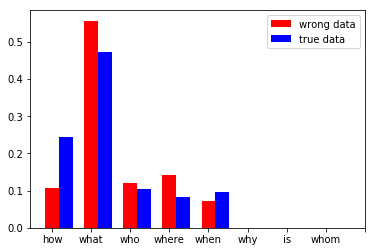

In [127]:
temp = [0, 1, 2, 3, 4, 5, 6, 7, 8]
ind = np.arange(8)
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, props[1], width, color='r', label="wrong data")
rects2 = ax.bar(ind + width, props[2], width, color='b', label="true data")
plti.legend(handles=[rects1, rects2])
plti.xticks(temp, props[0])
plti.show()



In [128]:
good_data = calc_test("./WikiQA/good.txt")

props = calculate_proportions(good_data[0], good_data[1], actual_data[0], actual_data[1])

{'how': 653, 'what': 1217, 'when': 263, 'where': 204, 'who': 268, 'is': 1}
2593.0


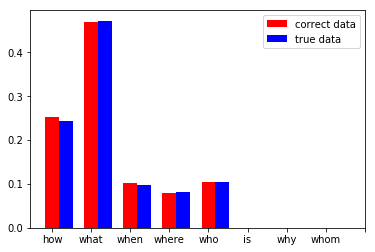

In [130]:
temp = [0, 1, 2, 3, 4, 5, 6, 7, 8]
ind = np.arange(8)
width = 0.35 
fig, ax = plt.subplots()
rects1 = ax.bar(ind, props[1], width, color='r', label="correct data")
rects2 = ax.bar(ind + width, props[2], width, color='b', label="true data")
plti.legend(handles=[rects1, rects2])
plti.xticks(temp, props[0])
plti.show()